## Diffusion equation

Here we solve diffusion equation using Finite difference and spectral methods of the PyGL library. The equation to solve is 
$$
\frac{\partial u}{\partial t} = D\nabla^2 u
$$
 
We first present the Finite difference method.

In [1]:
%matplotlib inline
import pygl
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt
import scipy as sp

In [2]:
## Class to simulate the diffusion equation and plot the field
class simulateDiffusion(): 
    def __init__(self):
        pass

    def Gaussian(self, mean,sigma,x):
        ''' Returns Gaussian distribution''' 
        return 1./(sigma*np.sqrt(2*np.pi))*np.exp(-0.5*(x-mean)**2/sigma**2)
            
   
    def simulate(self, u, D, T, Laplacian):
        ''' simulates and gives the snapshots of the configurations for some time instant '''
        plt.figure(num=None, figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k')
        for i in range(T):
            f_ = D*Laplacian*u
            u = u + dt*f_
                    
            if i==  0  or i==int(T/4) or i==int(T/2) or i==int(T-1):# or i==T-1:
                plt.plot(u,'-o', color="#A60628", alpha= .1 + (.9*i/T), label='Time = %g'%i, linewidth=3)   
         
        plt.legend(loc='lower right', fontsize=20); plt.axis('off')
        plt.title("Diffusion of an Gaussian pulse", fontsize=20)
        plt.show()

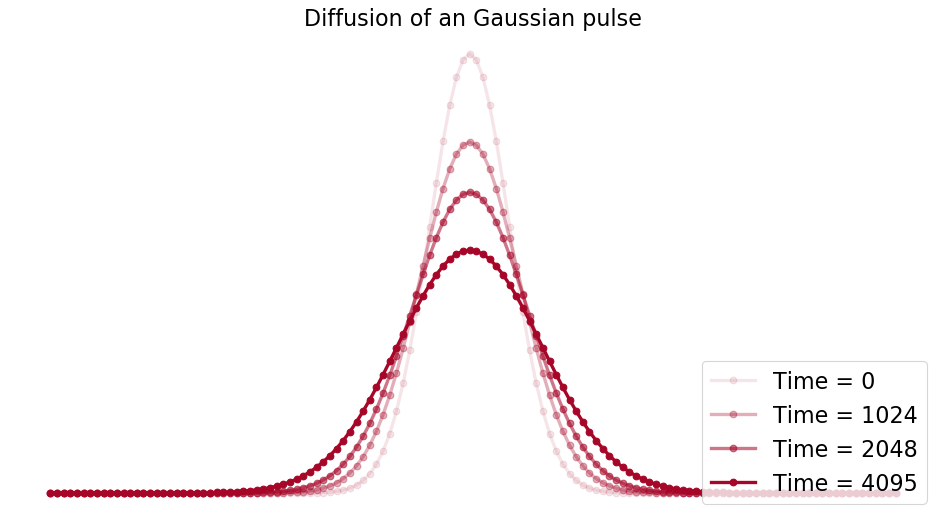

In [3]:
## This block simulates the diffusion equation for an initial Gaussian disturbance at the origin in 1d
# computing the Laplacian using pyMAFT finite difference routine
N, st, h = 128, 3, 1
fd  = pygl.dms.FD(N, st, h)
Laplacian=fd.diffmat(2) 


a, T, dt = 10, 4096, 0.01
x = np.linspace(1, N, N) 
D = 1.                         #Diffusion coefficient


# instantiate the class
rm = simulateDiffusion()


# Simulate 
u = rm.Gaussian(mean=N/2.,sigma=6,x=x)
rm.simulate(u, D, T, Laplacian)

We now solve the same problem using a spectral method 

This is done by using Fourier Solver of PyGL.

In [4]:
fft  = np.fft.fft
ifft = np.fft.ifft

## Class to simulate the diffusion equation and plot the field
class simulateDiffusionFourier(): 
    def __init__(self):
        pass

    def Gaussian(self, mean,sigma,x):
        ''' Returns Gaussian distribution''' 
        return 1./(sigma*np.sqrt(2*np.pi))*np.exp(-0.5*(x-mean)**2/sigma**2)
            
   
    def simulate(self, u, D, T, Laplacian):
        ''' simulates and gives the snapshots of the configurations for some time instant '''
        plt.figure(num=None, figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k')
        for i in range(T):
            f_ = D*Laplacian*u
            u = u + dt*f_
                    
            if i==  0  or i==int(T/4) or i==int(T/2) or i==int(T-1):# or i==T-1:
                plt.plot(np.real(ifft(u)),'-o', color="#A60628", alpha= .1 + (.9*i/T), label='Time = %g'%i, linewidth=3)   
        plt.legend(loc='lower right', fontsize=20); plt.axis('off')
        plt.title("Diffusion of an Gaussian pulse", fontsize=20)
        plt.show()

In [5]:
## This block simulates the diffusion equation for an initial Gaussian disturbance at the origin in 1d
dim, Nx, Ny = 1, N, N

a, T, dt = 10, 4096, 0.01
x = np.linspace(1, Nx, N) 
h = x[1]-x[0]       
D = 1.                         #Diffusion coefficient


# instantiate the class
rm = simulateDiffusionFourier()

# initial configuration
u = (rm.Gaussian(mean=Nx/2.,sigma=6,x=x))
uk = fft(u)

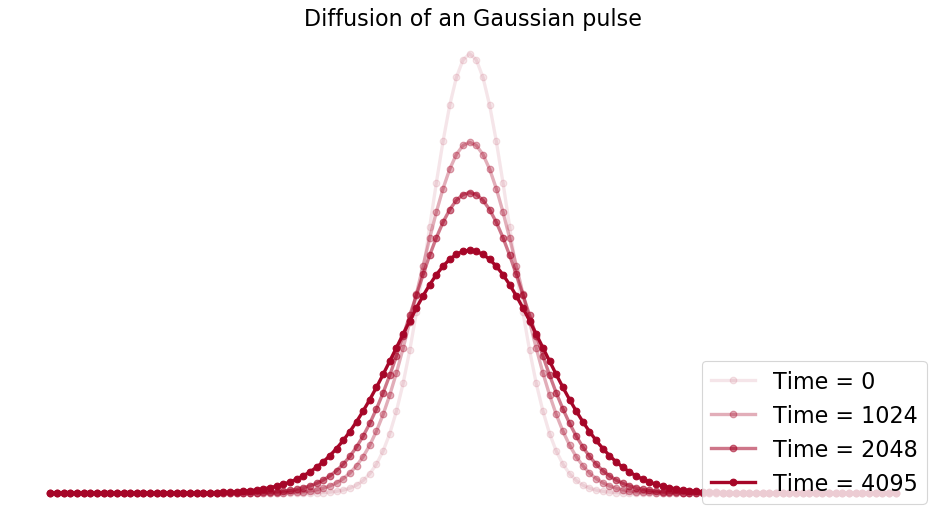

In [6]:
grid = {"dim":dim, "Nx":Nx, "Ny":Ny}

ss = pygl.dms.FourierSpectral(grid)
Laplacian = ss.diffmat(2)

rm.simulate(uk, D, T, Laplacian)